In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

# reflect the tables

Base = automap_base()
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
earliest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(f'The earliest date in the database is: {earliest_date}')

The earliest date in the database is: 2017-08-23


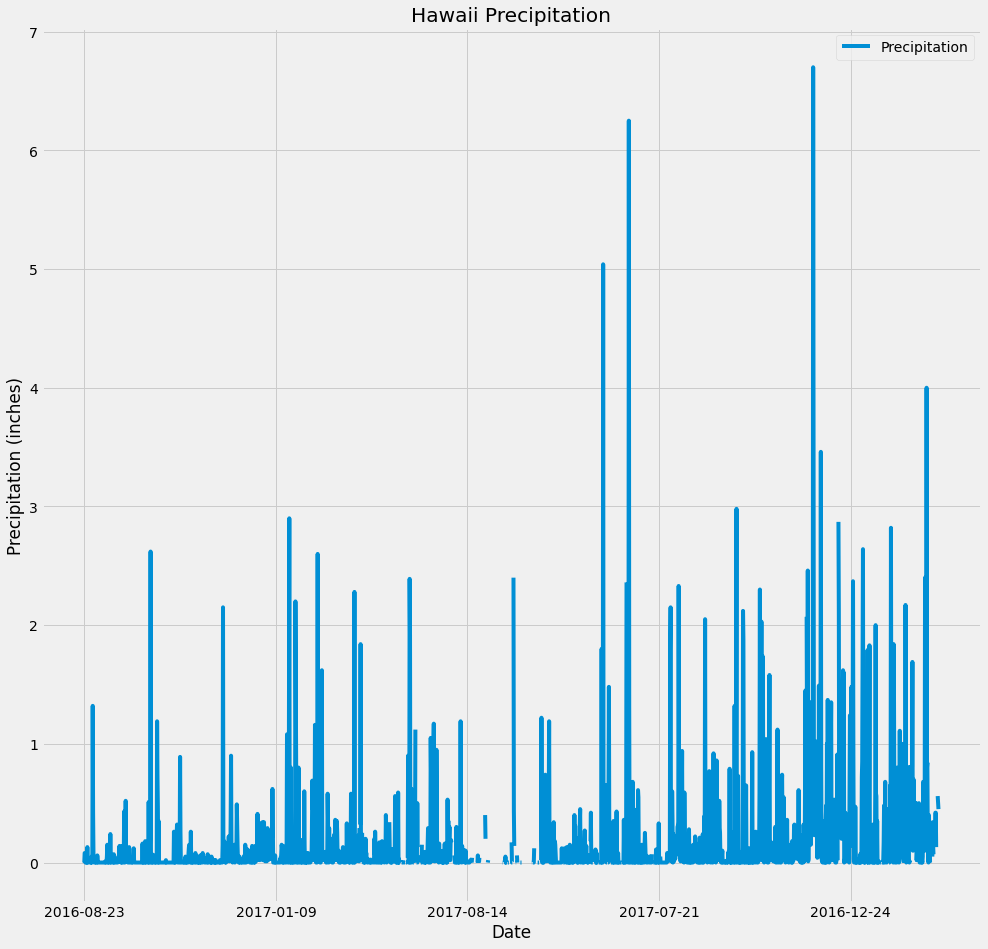

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

year_before = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_before).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(results, columns = ['date', 'precipitation'])

# Sort the dataframe by date

df.set_index(df['date'], inplace = True)

# Use Pandas Plotting with Matplotlib to plot the data

df.plot('date', 'precipitation', figsize=(15,15))
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.title("Hawaii Precipitation")
plt.legend(["Precipitation"],loc='upper right')
plt.show()



In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
num_stations = session.query(func.count(Station.id)).all()
print(f'The number of stations in this dataset is: {num_stations}')

The number of stations in this dataset is: [(9,)]


In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

sel = [Measurement.station,func.count(Measurement.id)]
activestations = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()
activestations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
mostactivestationdata = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).first()
print(f'The most active station has the following temeperatures(min, max, avg) as follows: {mostactivestationdata}')

The most active station has the following temeperatures(min, max, avg) as follows: (54.0, 85.0, 71.66378066378067)


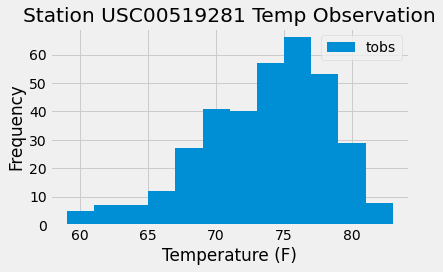

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
max_temp_obs = session.query(Measurement.station, Measurement.tobs)\
    .filter(Measurement.date >= '2016-08-23')\
    .filter(Measurement.station == 'USC00519281')\
    .all()
max_temp_obs_df = pd.DataFrame(max_temp_obs)
max_temp_obs_df.head()

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
max_temp_obs_df.plot.hist(bins=12)
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.title("Station USC00519281 Temp Observation")
plt.tight_layout()
plt.show()


# Close session

In [16]:
# Close Session
session.close()